#### filtering redundancy features

##### round 1: 21 features

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
# load datasets
case_cohort = pd.read_csv('../datasets/25-feature/POI-case-25_participant.csv')
control_cohort = pd.read_csv('../datasets/25-feature/POI-control-25_participant.csv')

In [3]:
case_cohort.loc[case_cohort['smoking status'] != 'Current', 'smoking status']= '0'
case_cohort.loc[case_cohort['smoking status'] == 'Current', 'smoking status']= '1'
control_cohort.loc[control_cohort['smoking status'] != 'Current', 'smoking status'] = '0'
control_cohort.loc[control_cohort['smoking status'] == 'Current', 'smoking status'] = '1'

In [4]:
# Use the mean value of the column 'BMI' to fill in the missing BMI values
mean_val = case_cohort['BMI'].mean()
case_cohort['BMI'].fillna(mean_val, inplace=True)
mean_val = control_cohort['BMI'].mean()
control_cohort['BMI'].fillna(mean_val, inplace=True)

In [5]:
# replace null sleep duration with mode
control_cohort['sleep duration'].fillna('Prefer not to answer', inplace=True)
case_cohort.loc[case_cohort['sleep duration'] == 'Do not know', 'sleep duration']= '7'
control_cohort.loc[control_cohort['sleep duration'] == 'Do not know', 'sleep duration'] = '7'
case_cohort.loc[case_cohort['sleep duration'] == 'Prefer not to answer', 'sleep duration'] = '7'
control_cohort.loc[control_cohort['sleep duration'] == 'Prefer not to answer', 'sleep duration'] = '7'

In [6]:
# replace sleeplessness	
control_cohort['sleeplessness'].fillna('Prefer not to answer', inplace=True)
case_cohort.loc[case_cohort['sleeplessness'] == 'Never/rarely', 'sleeplessness']= '0'
case_cohort.loc[case_cohort['sleeplessness'] == 'Sometimes', 'sleeplessness']= '0'
case_cohort.loc[case_cohort['sleeplessness'] == 'Usually', 'sleeplessness']= '1'
case_cohort.loc[case_cohort['sleeplessness'] == 'Prefer not to answer', 'sleeplessness']= '0'
control_cohort.loc[control_cohort['sleeplessness'] == 'Never/rarely', 'sleeplessness'] = '0'
control_cohort.loc[control_cohort['sleeplessness'] == 'Sometimes', 'sleeplessness'] = '0'
control_cohort.loc[control_cohort['sleeplessness'] == 'Usually', 'sleeplessness'] = '1'
control_cohort.loc[control_cohort['sleeplessness'] == 'Prefer not to answer', 'sleeplessness'] = '0'

In [7]:
# Use 'Do not know' to fill the missing coffee intake values
control_cohort['coffee intake'].fillna('Do not know', inplace=True)
case_cohort.loc[case_cohort['coffee intake'] == 'Less than one', 'coffee intake']= '0'
case_cohort.loc[case_cohort['coffee intake'] == 'Do not know', 'coffee intake']= '0'
case_cohort.loc[case_cohort['coffee intake'] == 'Prefer not to answer', 'coffee intake']= '0'
control_cohort.loc[control_cohort['coffee intake'] == 'Less than one', 'coffee intake'] = '0'
control_cohort.loc[control_cohort['coffee intake'] == 'Do not know', 'coffee intake'] = '0'
control_cohort.loc[control_cohort['coffee intake'] == 'Prefer not to answer', 'coffee intake'] = '0'

In [8]:
# Use 'Do not know' to fill the missing tea intake values
control_cohort['tea intake'].fillna('Do not know', inplace=True)
case_cohort.loc[case_cohort['tea intake'] == 'Less than one', 'tea intake']= '0'
case_cohort.loc[case_cohort['tea intake'] == 'Do not know', 'tea intake']= '0'
case_cohort.loc[case_cohort['tea intake'] == 'Prefer not to answer', 'tea intake']= '0'
control_cohort.loc[control_cohort['tea intake'] == 'Less than one', 'tea intake'] = '0'
control_cohort.loc[control_cohort['tea intake'] == 'Do not know', 'tea intake'] = '0'
control_cohort.loc[control_cohort['tea intake'] == 'Prefer not to answer', 'tea intake'] = '0'

In [9]:
case_cohort['moderate physical activity time spent'].fillna('None', inplace=True)
control_cohort['moderate physical activity time spent'].fillna('None', inplace=True)
case_cohort.loc[case_cohort['moderate physical activity time spent'] == 'None', 'moderate physical activity time spent']= '0'
case_cohort.loc[case_cohort['moderate physical activity time spent'] == 'Under 10 minutes', 'moderate physical activity time spent']= '0'
control_cohort.loc[control_cohort['moderate physical activity time spent'] == 'None', 'moderate physical activity time spent'] = '0'
control_cohort.loc[control_cohort['moderate physical activity time spent'] == 'Under 10 minutes', 'moderate physical activity time spent'] = '0'
case_cohort.loc[case_cohort['moderate physical activity time spent'] != '0', 'moderate physical activity time spent']= '1'
control_cohort.loc[control_cohort['moderate physical activity time spent'] != '0', 'moderate physical activity time spent'] = '1'

In [10]:
case_cohort['vigorous physical activity time spent'].fillna('None', inplace=True)
control_cohort['vigorous physical activity time spent'].fillna('None', inplace=True)
case_cohort.loc[case_cohort['vigorous physical activity time spent'] == 'None', 'vigorous physical activity time spent']= '0'
case_cohort.loc[case_cohort['vigorous physical activity time spent'] == 'Under 10 minutes', 'vigorous physical activity time spent']= '0'
control_cohort.loc[control_cohort['vigorous physical activity time spent'] == 'None', 'vigorous physical activity time spent'] = '0'
control_cohort.loc[control_cohort['vigorous physical activity time spent'] == 'Under 10 minutes', 'vigorous physical activity time spent'] = '0'
case_cohort.loc[case_cohort['vigorous physical activity time spent'] != '0', 'vigorous physical activity time spent']= '1'
control_cohort.loc[control_cohort['vigorous physical activity time spent'] != '0', 'vigorous physical activity time spent'] = '1'

In [11]:
control_cohort['alcohol intake frequency'].fillna('Never', inplace=True)
case_cohort.loc[case_cohort['alcohol intake frequency'] == 'Daily or almost daily', 'alcohol intake frequency']= '1'
case_cohort.loc[case_cohort['alcohol intake frequency'] == 'Three or four times a week', 'alcohol intake frequency']= '1'
control_cohort.loc[control_cohort['alcohol intake frequency'] == 'Daily or almost daily', 'alcohol intake frequency']= '1'
control_cohort.loc[control_cohort['alcohol intake frequency'] == 'Three or four times a week', 'alcohol intake frequency']= '1'
case_cohort.loc[case_cohort['alcohol intake frequency'] != '1', 'alcohol intake frequency']= '0'
control_cohort.loc[control_cohort['alcohol intake frequency'] != '1', 'alcohol intake frequency'] = '0'

In [12]:
control_cohort['salad/raw vegetable intake'].fillna('Do not know', inplace=True)
case_cohort.loc[case_cohort['salad/raw vegetable intake'] == 'Less than one', 'salad/raw vegetable intake']= '0'
case_cohort.loc[case_cohort['salad/raw vegetable intake'] == 'Do not know', 'salad/raw vegetable intake']= '0'
case_cohort.loc[case_cohort['salad/raw vegetable intake'] == 'Prefer not to answer', 'salad/raw vegetable intake']= '0'
control_cohort.loc[control_cohort['salad/raw vegetable intake'] == 'Less than one', 'salad/raw vegetable intake'] = '0'
control_cohort.loc[control_cohort['salad/raw vegetable intake'] == 'Do not know', 'salad/raw vegetable intake'] = '0'
control_cohort.loc[control_cohort['salad/raw vegetable intake'] == 'Prefer not to answer', 'salad/raw vegetable intake'] = '0'

In [13]:
control_cohort['fresh fruit intake'].fillna('Do not know', inplace=True)
case_cohort.loc[case_cohort['fresh fruit intake'] == 'Less than one', 'fresh fruit intake']= '0'
case_cohort.loc[case_cohort['fresh fruit intake'] == 'Do not know', 'fresh fruit intake']= '0'
case_cohort.loc[case_cohort['fresh fruit intake'] == 'Prefer not to answer', 'fresh fruit intake']= '0'
control_cohort.loc[control_cohort['fresh fruit intake'] == 'Less than one', 'fresh fruit intake'] = '0'
control_cohort.loc[control_cohort['fresh fruit intake'] == 'Do not know', 'fresh fruit intake'] = '0'
control_cohort.loc[control_cohort['fresh fruit intake'] == 'Prefer not to answer', 'fresh fruit intake'] = '0'

In [14]:
control_cohort['cooked vegetable intake'].fillna('Do not know', inplace=True)
case_cohort.loc[case_cohort['cooked vegetable intake'] == 'Less than one', 'cooked vegetable intake']= '0'
case_cohort.loc[case_cohort['cooked vegetable intake'] == 'Do not know', 'cooked vegetable intake']= '0'
case_cohort.loc[case_cohort['cooked vegetable intake'] == 'Prefer not to answer', 'cooked vegetable intake']= '0'
control_cohort.loc[control_cohort['cooked vegetable intake'] == 'Less than one', 'cooked vegetable intake'] = '0'
control_cohort.loc[control_cohort['cooked vegetable intake'] == 'Do not know', 'cooked vegetable intake'] = '0'
control_cohort.loc[control_cohort['cooked vegetable intake'] == 'Prefer not to answer', 'cooked vegetable intake'] = '0'

In [15]:
control_cohort['pork intake'].fillna('Never', inplace=True)
case_cohort.loc[case_cohort['pork intake'] == '2-4 times a week', 'pork intake']= '1'
case_cohort.loc[case_cohort['pork intake'] != '1', 'pork intake']= '0'
control_cohort.loc[control_cohort['pork intake'] == '2-4 times a week', 'pork intake']= '1'
control_cohort.loc[control_cohort['pork intake'] != '1', 'pork intake']= '0'

In [16]:
case_cohort['qualifications'].fillna('None of the above', inplace=True)
control_cohort['qualifications'].fillna('None of the above', inplace=True)
case_cohort.loc[case_cohort['qualifications'].str.contains('College or University degree'), 'qualifications']= '1'
case_cohort.loc[case_cohort['qualifications'] != '1', 'qualifications']= '0'
control_cohort.loc[control_cohort['qualifications'].str.contains('College or University degree'), 'qualifications']= '1'
control_cohort.loc[control_cohort['qualifications'] != '1', 'qualifications']= '0'

In [17]:
mean_val = case_cohort['waist circumference'].mean()
case_cohort['waist circumference'].fillna(mean_val, inplace=True)
mean_val = control_cohort['waist circumference'].mean()
control_cohort['waist circumference'].fillna(mean_val, inplace=True)

mean_val = case_cohort['HDL-C'].mean()
case_cohort['HDL-C'].fillna(mean_val, inplace=True)
mean_val = control_cohort['HDL-C'].mean()
control_cohort['HDL-C'].fillna(mean_val, inplace=True)

mean_val = case_cohort['LDL-C'].mean()
case_cohort['LDL-C'].fillna(mean_val, inplace=True)
mean_val = control_cohort['LDL-C'].mean()
control_cohort['LDL-C'].fillna(mean_val, inplace=True)

mean_val = case_cohort['apolipoprotein B'].mean()
case_cohort['apolipoprotein B'].fillna(mean_val, inplace=True)
mean_val = control_cohort['apolipoprotein B'].mean()
control_cohort['apolipoprotein B'].fillna(mean_val, inplace=True)

In [18]:
case_cohort['treatment/medication code'].fillna('No', inplace=True)
control_cohort['treatment/medication code'].fillna('No', inplace=True)

case_cohort.loc[case_cohort['treatment/medication code'].str.contains('atorvastatin'), 'treatment/medication code']= '1'
case_cohort.loc[case_cohort['treatment/medication code'].str.contains('cerivastatin'), 'treatment/medication code']= '1'
case_cohort.loc[case_cohort['treatment/medication code'].str.contains('fluvastatin'), 'treatment/medication code']= '1'
case_cohort.loc[case_cohort['treatment/medication code'].str.contains('lovastatin'), 'treatment/medication code']= '1'
case_cohort.loc[case_cohort['treatment/medication code'].str.contains('pravastatin'), 'treatment/medication code']= '1'
case_cohort.loc[case_cohort['treatment/medication code'].str.contains('rosuvastatin'), 'treatment/medication code']= '1'
case_cohort.loc[case_cohort['treatment/medication code'].str.contains('simvastatin'), 'treatment/medication code']= '1'
case_cohort.loc[case_cohort['treatment/medication code'].str.contains('vitamin c'), 'treatment/medication code']= '1'
case_cohort.loc[case_cohort['treatment/medication code'].str.contains('vitamin b'), 'treatment/medication code']= '1'
case_cohort.loc[case_cohort['treatment/medication code'] != '1', 'treatment/medication code']= '0'

control_cohort.loc[control_cohort['treatment/medication code'].str.contains('atorvastatin'), 'treatment/medication code']= '1'
control_cohort.loc[control_cohort['treatment/medication code'].str.contains('cerivastatin'), 'treatment/medication code']= '1'
control_cohort.loc[control_cohort['treatment/medication code'].str.contains('fluvastatin'), 'treatment/medication code']= '1'
control_cohort.loc[control_cohort['treatment/medication code'].str.contains('lovastatin'), 'treatment/medication code']= '1'
control_cohort.loc[control_cohort['treatment/medication code'].str.contains('pravastatin'), 'treatment/medication code']= '1'
control_cohort.loc[control_cohort['treatment/medication code'].str.contains('rosuvastatin'), 'treatment/medication code']= '1'
control_cohort.loc[control_cohort['treatment/medication code'].str.contains('simvastatin'), 'treatment/medication code']= '1'
control_cohort.loc[control_cohort['treatment/medication code'].str.contains('vitamin c'), 'treatment/medication code']= '1'
control_cohort.loc[control_cohort['treatment/medication code'].str.contains('vitamin b'), 'treatment/medication code']= '1'
control_cohort.loc[control_cohort['treatment/medication code'] != '1', 'treatment/medication code']= '0'

In [19]:
case_cohort['ICD10'].fillna('No', inplace=True)
control_cohort['ICD10'].fillna('No', inplace=True)

case_cohort.loc[case_cohort['ICD10'].str.contains('Y42.5'), 'ICD10']= '1'
case_cohort.loc[case_cohort['ICD10'] != '1', 'ICD10']= '0'
control_cohort.loc[control_cohort['ICD10'].str.contains('Y42.5'), 'ICD10']= '1'
control_cohort.loc[control_cohort['ICD10'] != '1', 'ICD10']= '0'

In [20]:
# Use 0s to fill the missing T2D values
case_cohort['T2D'].fillna(0, inplace=True)
control_cohort['T2D'].fillna(0, inplace=True)

In [21]:
case_cohort = case_cohort.drop('duration of moderate physical activity-pilot',axis=1)
control_cohort = control_cohort.drop('duration of moderate physical activity-pilot',axis=1)

case_cohort = case_cohort.drop('duration of vigorous physical activity-pilot',axis=1)
control_cohort = control_cohort.drop('duration of vigorous physical activity-pilot',axis=1)

case_cohort = case_cohort.drop('energy intake',axis=1)
control_cohort = control_cohort.drop('energy intake',axis=1)

case_cohort = case_cohort.drop('job code',axis=1)
control_cohort = control_cohort.drop('job code',axis=1)

In [22]:
# saved fullfilled files
case_cohort.to_csv('../datasets/21-feature/cleaned_case.csv', index=None)
control_cohort.to_csv('../datasets/21-feature/cleaned_control.csv', index=None)

In [23]:
case_cohort = case_cohort.astype('float32')
control_cohort = control_cohort.astype('float32')

# add labels and merge
case_cohort.insert(case_cohort.shape[1], 'label', 1)
control_cohort.insert(control_cohort.shape[1], 'label', 0)
merged = pd.concat([case_cohort, control_cohort])
merged

,eid,smoking status,sleep duration,sleeplessness,coffee intake,tea intake,moderate physical activity time spent,vigorous physical activity time spent,alcohol intake frequency,salad/raw vegetable intake,...,qualifications,BMI,waist circumference,HDL-C,LDL-C,apolipoprotein B,treatment/medication code,ICD10,T2D,label
0,1004331.0,0.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,18.209801,65.0,-1.165660,-0.314136,0.925000,0.0,0.0,0.000000,1
1,1005087.0,0.0,7.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,...,0.0,31.288300,91.0,1.115530,-0.377054,1.082000,0.0,0.0,0.000000,1
2,1007659.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,...,1.0,31.840500,102.0,-0.464109,1.570590,1.113000,0.0,0.0,-0.395678,1
3,1014838.0,0.0,7.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,...,0.0,24.308001,70.0,0.150831,1.169080,1.209000,0.0,0.0,0.000000,1
4,1019851.0,0.0,9.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,...,0.0,25.179701,77.0,-0.638671,1.749310,0.835000,1.0,0.0,0.442098,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50582,6022151.0,0.0,8.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,27.765100,87.0,-1.058820,-0.942836,1.311000,0.0,0.0,-1.360960,0
50583,6022571.0,0.0,6.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,25.965099,74.0,1.139240,-0.222365,1.094000,0.0,0.0,0.000000,0
50584,6023181.0,0.0,6.0,1.0,4.0,4.0,0.0,0.0,0.0,5.0,...,0.0,23.815001,74.0,-0.896226,-0.271863,0.842000,0.0,0.0,-1.624070,0
50585,6023229.0,1.0,7.0,1.0,1.0,6.0,0.0,0.0,0.0,1.0,...,0.0,27.744101,88.0,0.022764,-0.077343,1.060069,0.0,0.0,0.000000,0


In [24]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score, f1_score,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc

In [25]:
# shuffle and split dataset
dropped = merged.drop('eid',axis=1)
shuffled = shuffle(dropped)
train_data = shuffled[0:int(shuffled.shape[0]*0.9)]
test_data = shuffled[int(shuffled.shape[0]*0.9):]
print(train_data.shape[0])
print(test_data.shape[0])

55090
6122


In [26]:
# fetch values
nor_feature_train = train_data.drop('label',axis=1)
X_train = nor_feature_train.values
nor_feature_test = test_data.drop('label',axis=1)
X_test = nor_feature_test.values
Y_train = train_data['label'].values
Y_test = test_data['label'].values

In [32]:
# grid search
other_params = {'eta': 0.3, 'n_estimators': 420, 'gamma': 0, 'max_depth': 20, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0, 'scale_pos_weight':5,
                'seed': 33}

#cv_params = {'n_estimators': np.linspace(100, 2000, 20, dtype=int)} # 400
#cv_params = {'n_estimators': np.linspace(350, 450, 11, dtype=int)} # 430
cv_params = {'max_depth': np.linspace(1, 50, 10, dtype=int)} # 39

xgb_model = xgb.XGBClassifier(**other_params)
gs = GridSearchCV(xgb_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, Y_train)
gs.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'max_depth': 39}

In [33]:
clf_xgb = xgb.XGBClassifier(n_estimators=430, scale_pos_weight=5, max_depth=39)
clf_xgb.fit(X_train,Y_train)

import pickle
with open('../models/21-feature/XGB.pickle', 'wb') as f:
    pickle.dump(clf_xgb, f)

confusion_matrix
 [[4914  141]
 [ 927  140]]
accuracy:0.825547206795165
precision:0.498220640569395
recall:0.13120899718837864
f1-score:0.20771513353115728


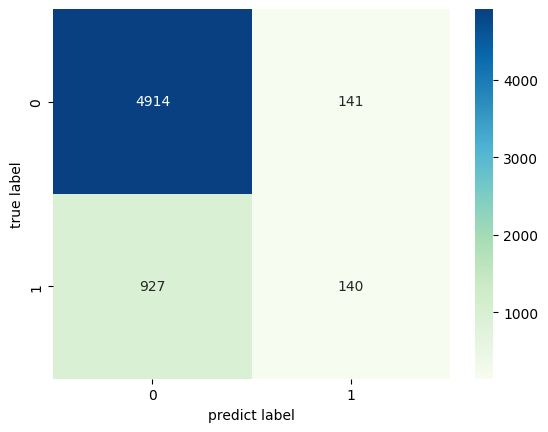

In [34]:
y_score = clf_xgb.predict(X_test)                                   
y_score_pro = clf_xgb.predict_proba(X_test) # (212, 2)
y_one_hot = to_categorical(Y_test)
y_score_one_hot = to_categorical(y_score)

obj1 = confusion_matrix(Y_test, y_score)
print('confusion_matrix\n', obj1)
print('accuracy:{}'.format(accuracy_score(Y_test, y_score)))
print('precision:{}'.format(precision_score(Y_test, y_score)))
print('recall:{}'.format(recall_score(Y_test, y_score)))
print('f1-score:{}'.format(f1_score(Y_test, y_score)))

import seaborn as sns
sns.heatmap(obj1, fmt='d', cmap='GnBu', annot=True)
plt.ylabel("true label")
plt.xlabel("predict label")
plt.show()

AUC :  0.8630027510957905


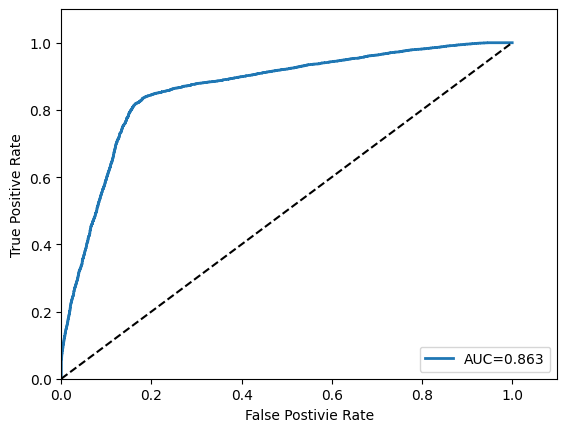

In [35]:
fpr_xgb, tpr_xgb, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
auc_xgb = auc(fpr_xgb, tpr_xgb)
print("AUC : ", auc_xgb)

plt.plot(fpr_xgb, tpr_xgb, linewidth = 2,label='AUC=%.3f' % auc_xgb)
plt.plot([0,1],[0,1], 'k--')
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()